# 划分数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol',
                  'Malic acid','Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline'] #设置列标题
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [2]:
print('Class labels',np.unique(df_wine['Class label'])) #查看类标数量

Class labels [1 2 3]


In [3]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 特征缩放

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler() #特征归一化0~1，特征标准化-1~1，一般来说标准化呈正态分布，更新权重更方便
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_norm[0:3]

array([[0.60483871, 0.17786561, 0.98013245, 0.25257732, 0.43478261,
        0.53956835, 0.63872832, 0.42      , 0.29968454, 0.28327645,
        0.49593496, 0.56981132, 0.42938659],
       [0.32795699, 0.78656126, 0.78145695, 0.53608247, 0.20652174,
        0.10071942, 0.        , 0.8       , 0.12302839, 0.21928328,
        0.2195122 , 0.        , 0.31526391],
       [0.62096774, 0.03952569, 0.66225166, 0.32989691, 0.43478261,
        0.51438849, 0.23988439, 0.84      , 0.00315457, 0.1612628 ,
        0.43902439, 0.2490566 , 0.33666191]])

In [5]:
X_train_std[:3]

array([[ 0.35187234, -0.68054087,  1.87373506, -1.20683431,  0.67800848,
         0.49259496,  0.710453  , -0.18043033, -0.40214586, -0.22852995,
         0.6417373 ,  0.27567352,  0.4156084 ],
       [-0.93768678,  1.93954148,  0.70067979,  0.45894387, -0.78716503,
        -1.49991215, -1.55763345,  1.44206532, -1.3535942 , -0.52453672,
        -0.79555788, -1.80398444, -0.10380393],
       [ 0.42699229, -1.27601413, -0.00315337, -0.75253117,  0.67800848,
         0.37827078, -0.70581817,  1.61285433, -1.99921986, -0.79291619,
         0.34582358, -0.89499487, -0.00641411]])

# 特征选择

### L1正则化满足数据稀疏化

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',C=1.0,multi_class='auto',solver='liblinear')
lr.fit(X_train_std,y_train)
print ('Training accuracy:',lr.score(X_train_std,y_train))
print ('test accuracy:',lr.score(X_test_std,y_test))
print (lr.intercept_) #获得截距项
print (lr.coef_) #获得权重系数，有三个权重是针对多分类的情况所采用的一对多方法OvR

Training accuracy: 1.0
test accuracy: 1.0
[-1.46730682 -1.71951314 -1.88317903]
[[ 1.40907962  0.23890294  0.67539692 -1.46118377  0.          0.
   0.96355142  0.          0.          0.          0.          1.09396017
   1.93002848]
 [-1.100625   -0.52585109 -1.05801415  0.67403156  0.          0.14845801
   0.          0.13964725  0.19606079 -2.60756534  0.80906298  0.10490094
  -1.86596869]
 [ 0.          0.23500129  0.44616822  0.          0.          0.
  -1.95438489 -0.13388816  0.          1.90590531 -0.72998111 -1.0220971
   0.        ]]


### 正则化效果图（暂略）

### 特征选择算法

SBS (暂略) 详见 ForestDemo.py 之L1特征选择

In [7]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

# 主成分分析

##  方差贡献率

In [8]:
cov_mat = np.cov(X_train_std.T)#获取协方差
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)#计算矩阵的特征值和右特征向量
print ('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.74396741 2.65812903 1.30832071 0.96718916 0.82414304 0.69104146
 0.60238306 0.07813541 0.15854208 0.19822871 0.31785991 0.26211388
 0.29563721]


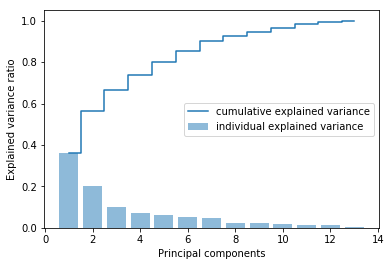

In [9]:
tot = sum(eigen_vals)
var_exp = [(i/tot)
          for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)#按照所给定的轴参数返回元素的梯形累计和

plt.bar(range(1,14),var_exp, alpha=0.5,align='center',
       label = 'individual explained variance')#柱状图
plt.step(range(1,14),cum_var_exp,where='mid',
        label = 'cumulative explained variance')#绘制步进图
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

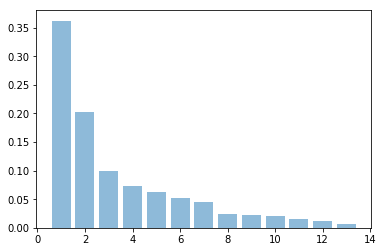

In [10]:
'''sklearn实现主成分分析重要性分布'''
from sklearn.decomposition import PCA
pca_nc = PCA()
pca_nc.fit(X_train_std)
var_skn=pca_nc.explained_variance_ratio_.tolist()
plt.bar(range(1,14),var_skn, alpha=0.5,align='center',
       label = 'individual explained variance')#柱状图
plt.show()

## 特征转换

In [11]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i])
              for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:,np.newaxis]))#hstack 水平堆叠矩阵
print('Matrix W:\n',w[:5])
X_train_std[0].dot(w)

Matrix W:
 [[-0.12947497  0.49034281]
 [ 0.23471718  0.17547743]
 [ 0.01392829  0.37909516]
 [ 0.24820353 -0.01327962]
 [-0.13225744  0.34297599]]


array([-1.45629891,  0.87612211])

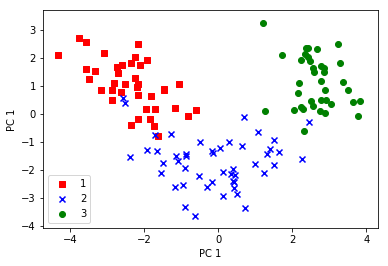

In [12]:
X_train_pca = X_train_std.dot(w)
colors=['r','b','g']
markers = ['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train == l, 0],
               X_train_pca[y_train == l, 1],
               c=c ,label=l,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 1')
plt.legend(loc='lower left')
plt.show()

# 线性判别分析LDA-sklearn

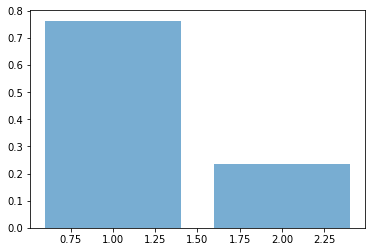

0.9629629629629629


In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda.fit(X_train_std,y_train)
var_skn=lda.explained_variance_ratio_.tolist()

plt.bar(range(1,len(var_skn)+1),var_skn, alpha=0.6,align='center',
       label = 'individual explained variance')#柱状图
plt.show()

X_train_lda = lda.transform(X_train_std)
X_test_lda = lda.transform(X_test_std)
lr = LogisticRegression(solver='lbfgs',multi_class='auto')
lr = lr.fit(X_train_lda,y_train)
print (lr.score(X_test_lda,y_test))